In [21]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

#Edit the parameters to view more or less cryptocurrencies

parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6de05f0f-e7e9-4bf7-bf49-9ec0fe53e3eb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2022-06-13T21:19:14.954Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9991}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9530, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [22]:
type(data)

dict

In [23]:
import pandas as pd

#This allows you to see all the columns/rows instead of just 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2022-06-13T21:19:14.954Z,0,None,25,1,None,9991


In [59]:
# The code below normalizes the data and makes it organized in a dataframe

df = pd.json_normalize(data['data'])

#Timestamp

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9530,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19066568.00000,19066568.00000,NaN,1,NaN,NaN,2022-06-13T21:18:00.000Z,23296.26113,66454601635.63585,107.74050,-0.55527,-15.20372,-25.99725,-20.76376,-41.60682,-40.93141,444179747003.81525,45.77010,489221483755.23999,2022-06-13T21:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 22:56:05.136636
1,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121160446.31150,121160446.31150,NaN,2,NaN,NaN,2022-06-13T21:17:00.000Z,1243.50589,44993070882.35007,97.07050,-0.26516,-16.09129,-33.26824,-37.79172,-58.72804,-52.49432,150663728065.82498,15.52500,150663728065.82001,2022-06-13T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 22:56:05.136636
2,825,Tether,USDT,tether,34644,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72293981300.94582,79710622658.21005,NaN,3,NaN,NaN,2022-06-13T21:17:00.000Z,0.99862,105959262128.98207,88.44370,-0.00590,-0.04633,-0.07754,-0.01708,-0.15451,-0.17457,72193975976.19313,7.43920,79600357784.67999,2022-06-13T21:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-13 22:56:05.136636
3,3408,USD Coin,USDC,usd-coin,4402,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54221598913.02280,54221598913.02280,NaN,4,NaN,NaN,2022-06-13T21:17:00.000Z,1.00018,13612703325.46938,129.67290,-0.04506,0.00473,-0.00499,0.00280,0.01911,0.07056,54231422091.98862,5.58920,54231422091.99000,2022-06-13T21:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-13 22:56:05.136636
4,1839,BNB,BNB,bnb,948,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-13T21:17:00.000Z,227.09811,2453565247.44640,82.89150,-0.46652,-13.56407,-23.25669,-21.02025,-45.27426,-38.91925,37079892391.12791,3.82090,37497704171.98000,2022-06-13T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 22:56:05.136636
5,4687,Binance USD,BUSD,binance-usd,3837,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17620018855.69926,17620018855.69926,NaN,6,NaN,NaN,2022-06-13T21:17:00.000Z,1.00158,11459434002.46235,108.64120,0.11843,-0.01043,0.23501,0.22018,0.24197,0.07726,17647923599.47842,1.81850,17647923599.48000,2022-06-13T21:17:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-13 22:56:05.136636
6,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,7,NaN,NaN,2022-06-13T21:17:00.000Z,0.48031,2524266141.62028,71.59450,-0.14104,-7.44945,-20.46826,-7.67867,-48.46292,-40.12825,16298964281.28157,1.67950,21614084588.17000,2022-06-13T21:17:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-13 22:56:05.136636
7,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,2022-06-13T21:18:00.000Z,0.32073,2508706089.85999,86.24820,-1.29964,-9.83017,-20.32456,-22.67714,-55.27222,-58.12496,15505086539.23343,1.59770,32073007637.74000,2022-06-13T21:18:00.000Z,1839.00000,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156

In [29]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

#Edit the parameters to view more or less cryptocurrencies

    parameters = {
    'start':'1',
    'limit':'20',
    'convert':'USD'
}
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '6de05f0f-e7e9-4bf7-bf49-9ec0fe53e3eb',
}

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
# The code below normalizes the data and makes it organized in a dataframe

    df2 = pd.json_normalize(data['data'])

#Timestamp

    df2['timestamp'] = pd.to_datetime('now')

#Append dataframe

    df = df.append(df2)
    
# Use this if you want to create a csv and append data to it
   
    if not os.path.isfile(r'C:\Users\Cory\Desktop\Jupyter Notebooks\API.csv'):
        df.to_csv(r'C:\Users\Cory\Desktop\Jupyter Notebooks\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Cory\Desktop\Jupyter Notebooks\API.csv', mode='a', header=False)
        

In [31]:
#Then to read in the file: 
df = pd.read_csv(r'C:\Users\Cory\Desktop\Jupyter Notebooks\API.csv')

In [32]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [33]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timetamp
0,0.0,1,Bitcoin,BTC,bitcoin,9530,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.906657e+07,1.906657e+07,NaN,1,NaN,NaN,2022-06-13T21:18:00.000Z,23296.261131,6.645460e+10,107.7405,-0.555270,-15.203717,-25.997248,-20.763764,-41.606824,-40.931411,4.441797e+11,45.7701,4.892215e+11,2022-06-13T21:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 21:20:26.657498
1,1.0,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.211604e+08,1.211604e+08,NaN,2,NaN,NaN,2022-06-13T21:17:00.000Z,1243.505885,4.499307e+10,97.0705,-0.265159,-16.091289,-33.268242,-37.791724,-58.728042,-52.494319,1.506637e+11,15.5250,1.506637e+11,2022-06-13T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 21:20:26.657498
2,2.0,825,Tether,USDT,tether,34644,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.229398e+10,7.971062e+10,NaN,3,NaN,NaN,2022-06-13T21:17:00.000Z,0.998617,1.059593e+11,88.4437,-0.005900,-0.046329,-0.077542,-0.017083,-0.154507,-0.174568,7.219398e+10,7.4392,7.960036e+10,2022-06-13T21:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-13 21:20:26.657498
3,3.0,3408,USD Coin,USDC,usd-coin,4402,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.422160e+10,5.422160e+10,NaN,4,NaN,NaN,2022-06-13T21:17:00.000Z,1.000181,1.361270e+10,129.6729,-0.045058,0.004726,-0.004989,0.002802,0.019105,0.070564,5.423142e+10,5.5892,5.423142e+10,2022-06-13T21:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-13 21:20:26.657498
4,4.0,1839,BNB,BNB,bnb,948,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-13T21:17:00.000Z,227.098110,2.453565e+09,82.8915,-0.466521,-13.564072,-23.256693,-21.020246,-45.274257,-38.919247,3.707989e+10,3.8209,3.749770e+10,2022-06-13T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 21:20:26.657498
5,5.0,4687,Binance USD,BUSD,binance-usd,3837,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.762002e+10,1.762002e+10,NaN,6,NaN,NaN,2022-06-13T21:17:00.000Z,1.001584,1.145943e+10,108.6412,0.118429,-0.010434,0.235007,0.220177,0.241969,0.077256,1.764792e+10,1.8185,1.764792e+10,2022-06-13T21:17:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-13 21:20:26.657498
6,6.0,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",4.500000e+10,3.393405e+10,3.427770e+10,NaN,7,NaN,NaN,2022-06-13T21:17:00.000Z,0.480313,2.524266e+09,71.5945,-0.141039,-7.449451,-20.468264,-7.678674,-48.462924,-40.128249,1.629896e+10,1.6795,2.161408e+10,2022-06-13T21:17:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-13 21:20:26.657498
7,7.0,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,2022-06-13T21:18:00.000Z,0.320730,2.508706e+09,86.2482,-1.299637,-9.830172,-20.324556,-22.677141,-55.272221,-58.124964,1.550509e+10,1.5977,3.207301e+10,2022-06-13T21:18:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-13 21:20:26.657498
8,8.0,5426,Solana,SOL,solana,329,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-

In [34]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [35]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timetamp
0,0.00000,1,Bitcoin,BTC,bitcoin,9530,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19066568.00000,19066568.00000,NaN,1,NaN,NaN,2022-06-13T21:18:00.000Z,23296.26113,66454601635.63585,107.74050,-0.55527,-15.20372,-25.99725,-20.76376,-41.60682,-40.93141,444179747003.81531,45.77010,489221483755.23999,2022-06-13T21:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 21:20:26.657498
1,1.00000,1027,Ethereum,ETH,ethereum,5747,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121160446.31150,121160446.31150,NaN,2,NaN,NaN,2022-06-13T21:17:00.000Z,1243.50589,44993070882.35007,97.07050,-0.26516,-16.09129,-33.26824,-37.79172,-58.72804,-52.49432,150663728065.82498,15.52500,150663728065.82001,2022-06-13T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 21:20:26.657498
2,2.00000,825,Tether,USDT,tether,34644,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,72293981300.94582,79710622658.21005,NaN,3,NaN,NaN,2022-06-13T21:17:00.000Z,0.99862,105959262128.98209,88.44370,-0.00590,-0.04633,-0.07754,-0.01708,-0.15451,-0.17457,72193975976.19313,7.43920,79600357784.67999,2022-06-13T21:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-13 21:20:26.657498
3,3.00000,3408,USD Coin,USDC,usd-coin,4402,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,54221598913.02280,54221598913.02280,NaN,4,NaN,NaN,2022-06-13T21:17:00.000Z,1.00018,13612703325.46938,129.67290,-0.04506,0.00473,-0.00499,0.00280,0.01911,0.07056,54231422091.98863,5.58920,54231422091.99000,2022-06-13T21:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-13 21:20:26.657498
4,4.00000,1839,BNB,BNB,bnb,948,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-13T21:17:00.000Z,227.09811,2453565247.44640,82.89150,-0.46652,-13.56407,-23.25669,-21.02025,-45.27426,-38.91925,37079892391.12791,3.82090,37497704171.98000,2022-06-13T21:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-13 21:20:26.657498
5,5.00000,4687,Binance USD,BUSD,binance-usd,3837,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,17620018855.69926,17620018855.69926,NaN,6,NaN,NaN,2022-06-13T21:17:00.000Z,1.00158,11459434002.46235,108.64120,0.11843,-0.01043,0.23501,0.22018,0.24197,0.07726,17647923599.47842,1.81850,17647923599.48000,2022-06-13T21:17:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-13 21:20:26.657498
6,6.00000,2010,Cardano,ADA,cardano,455,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",45000000000.00000,33934048405.59300,34277702081.60500,NaN,7,NaN,NaN,2022-06-13T21:17:00.000Z,0.48031,2524266141.62028,71.59450,-0.14104,-7.44945,-20.46826,-7.67867,-48.46292,-40.12825,16298964281.28157,1.67950,21614084588.17000,2022-06-13T21:17:00.000Z,1839.00000,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-13 21:20:26.657498
7,7.00000,52,XRP,XRP,xrp,737,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,2022-06-13T21:18:00.000Z,0.32073,2508706089.85999,86.24820,-1.29964,-9.83017,-20.32456,-22.67714,-55.27222,-58.12496,15505086539.23343,1.59770,32073007637.74000,2022-0

In [36]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.97355,-15.39242,-26.27973,-21.35391,-41.84268,-41.24463
Ethereum,-0.80979,-16.19452,-33.54501,-38.33132,-58.86099,-52.71716
Tether,-0.00190,-0.03528,-0.07032,-0.01394,-0.14722,-0.16329
USD Coin,-0.01902,0.00675,-0.00905,-0.00802,0.03993,0.06035
BNB,-0.78384,-13.64020,-23.61007,-21.53023,-45.44981,-39.14767
Binance USD,-0.05863,0.01734,0.02098,0.01255,-0.02014,0.04359
Cardano,-0.79183,-7.43806,-21.06156,-8.53837,-48.66228,-40.32275
XRP,-1.75637,-10.32819,-20.84579,-23.65902,-55.58603,-58.41217
Solana,-1.82468,-11.10352,-32.92405,-43.29554,-71.50392,-65.79763


In [39]:
type(df3)

pandas.core.frame.DataFrame

In [37]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h     -0.97355
                 quote.USD.percent_change_24h   -15.39242
                 quote.USD.percent_change_7d    -26.27973
                 quote.USD.percent_change_30d   -21.35391
                 quote.USD.percent_change_60d   -41.84268
                 quote.USD.percent_change_90d   -41.24463
Ethereum         quote.USD.percent_change_1h     -0.80979
                 quote.USD.percent_change_24h   -16.19452
                 quote.USD.percent_change_7d    -33.54501
                 quote.USD.percent_change_30d   -38.33132
                 quote.USD.percent_change_60d   -58.86099
                 quote.USD.percent_change_90d   -52.71716
Tether           quote.USD.percent_change_1h     -0.00190
                 quote.USD.percent_change_24h    -0.03528
                 quote.USD.percent_change_7d     -0.07032
                 quote.USD.percent_change_30d    -0.01394
                 quote.USD

In [38]:
type(df4)

pandas.core.series.Series

In [40]:
df5 = df4.to_frame(name='values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h   -0.97355
                quote.USD.percent_change_24h -15.39242
                quote.USD.percent_change_7d  -26.27973
                quote.USD.percent_change_30d -21.35391
                quote.USD.percent_change_60d -41.84268
                quote.USD.percent_change_90d -41.24463
Ethereum        quote.USD.percent_change_1h   -0.80979
                quote.USD.percent_change_24h -16.19452
                quote.USD.percent_change_7d  -33.54501
                quote.USD.percent_change_30d -38.33132
                quote.USD.percent_change_60d -58.86099
                quote.USD.percent_change_90d -52.71716
Tether          quote.USD.percent_change_1h   -0.00190
                quote.USD.percent_change_24h  -0.03528
                quote.USD.percent_change_7d   -0.07032
                quote.USD.percent_change_30d  -0.01394
                quote.USD.percent_change_60d  -0.14722
                quote.USD.percent_change_90d  -0.16329
USD Coin        quote.USD.percent_change_1h   -0.01902
                quote.USD.percent_change_24h   0.00675
                quote.USD.percent_change_7d   -0.00905
                quote.USD.percent_change_30d  -0.00802
                quote.USD.percent_change_60d   0.03993
                quote.USD.percent_change_90d   0.06035
BNB             quote.USD.percent_change_1h   -0.78384
                quote.USD.percent_change_24h -13.64020
                quote.USD.percent_change_7d  -23.61007
                quote.USD.percent_change_30d -21.53023
                quote.USD.percent_change_60d -45.44981
                quote.USD.percent_change_90d -39.14767
Binance USD     quote.USD.percent_change_1h   -0.05863
                quote.USD.percent_change_24h   0.01734
                quote.USD.percent_change_7d    0.02098
                quote.USD.percent_change_30d   0.01255
                quote.USD.percent_change_60d  -0.02014
                quote.USD.percent_change_90d   0.04359
Cardano         quote.USD.percent_change_1h   -0.79183
                quote.USD.percent_change_24h  -7.43806
                quote.USD.percent_change_7d  -21.06156
                quote.USD.percent_change_30d  -8.53837
                quote.USD.percent_change_60d -48.66228
                quote.USD.percent_change_90d -40.32275
XRP             quote.USD.percent_change_1h   -1.75637
                quote.USD.percent_change_24h -10.32819
                quote.USD.percent_change_7d  -20.84579
                quote.USD.percent_change_30d -23.65902
                quote.USD.percent_change_60d -55.58603
                quote.USD.percent_change_90d -58.41217
Solana          quote.USD.percent_change_1h   -1.82468
                quote.USD.percent_change_24h -11.10352
                quote.USD.percent_change_7d  -32.92405
                quote.USD.percent_change_30d -43.29554
                quote.USD.percent_change_60d -71.50392
                quote.USD.percent_change_90d -65.79763
Dogecoin        quote.USD.percent_change_1h   -0.70141
                quote.USD.percent_change_24h -15.20371
                quote.USD.percent_change_7d  -31.67410
                quote.USD.percent_change_30d -35.91109
                quote.USD.percent_change_60d -60.64856
                quote.USD.percent_change_90d -50.23959
Polkadot        quote.USD.percent_change_1h   -0.03851
                quote.USD.percent_change_24h  -7.82712
                quote.USD.percent_change_7d  -24.85768
                quote.USD.percent_change_30d -35.43383
                quote.USD.percent_change_60d -59.83016
                quote.USD.percent_change_90d -59.99832
Dai             quote.USD.percent_change_1h   -0.07262
                quote.USD.percent_change_24h   0.01643
                quote.USD.percent_change_7d    0.04385
                quote.USD.percent_change_30d  -0.02018
                quote.USD.percent_change_60d   0.04580
                quote.USD.percent

In [41]:
type(df5)

pandas.core.frame.DataFrame

In [42]:
df5.count()

values    120
dtype: int64

In [47]:
#Because of how it's structured above I need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. So I can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(120))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.97355
1,Bitcoin,quote.USD.percent_change_24h,-15.39242
2,Bitcoin,quote.USD.percent_change_7d,-26.27973
3,Bitcoin,quote.USD.percent_change_30d,-21.35391
4,Bitcoin,quote.USD.percent_change_60d,-41.84268
5,Bitcoin,quote.USD.percent_change_90d,-41.24463
6,Ethereum,quote.USD.percent_change_1h,-0.80979
7,Ethereum,quote.USD.percent_change_24h,-16.19452
8,Ethereum,quote.USD.percent_change_7d,-33.54501
9,Ethereum,quote.USD.percent_change_30d,-38.33132


In [48]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.97355
1,Bitcoin,quote.USD.percent_change_24h,-15.39242
2,Bitcoin,quote.USD.percent_change_7d,-26.27973
3,Bitcoin,quote.USD.percent_change_30d,-21.35391
4,Bitcoin,quote.USD.percent_change_60d,-41.84268
5,Bitcoin,quote.USD.percent_change_90d,-41.24463
6,Ethereum,quote.USD.percent_change_1h,-0.80979
7,Ethereum,quote.USD.percent_change_24h,-16.19452
8,Ethereum,quote.USD.percent_change_7d,-33.54501
9,Ethereum,quote.USD.percent_change_30d,-38.33132


In [49]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.97355
1,Bitcoin,24h,-15.39242
2,Bitcoin,7d,-26.27973
3,Bitcoin,30d,-21.35391
4,Bitcoin,60d,-41.84268
5,Bitcoin,90d,-41.24463
6,Ethereum,quote.USD.percent_change_1h,-0.80979
7,Ethereum,24h,-16.19452
8,Ethereum,7d,-33.54501
9,Ethereum,30d,-38.33132


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

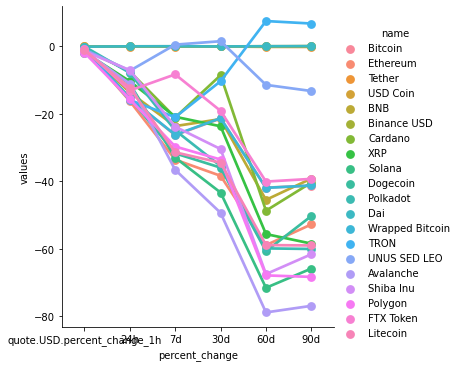

In [51]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,23296.26113,2022-06-13 22:56:05.136636


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

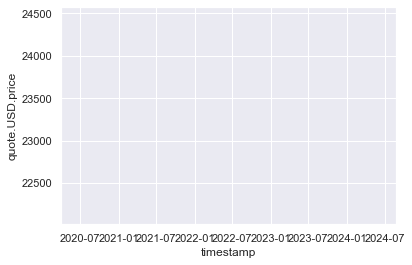

In [62]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

In [67]:
def sinplot (flip=1):
    x = np.linspace (0, 14, 100)
    for i in range (1, 7):
        plt.plot (x, np.sin(x + i * .5) * (7 - i) * flip)

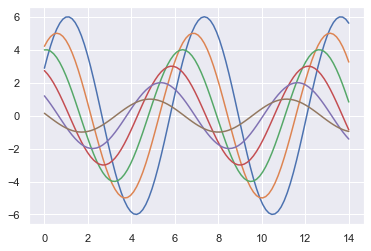

In [68]:
sinplot()